Partial Least Squares Model Sample - Biomechanical Modeling with Motion Capture Data: what is the Impact on Pitch Speed?

Driveline Motion Capture Data: https://www.kaggle.com/datasets/paultimothymooney/drivelineresearch-openbiomechanicsproject


Template Model: https://www.statology.org/partial-least-squares-in-python/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [10]:
pitching_poi_df = pd.read_csv("https://raw.githubusercontent.com/A-Bin1/Statistical-Samples/main/poi_metrics.csv")

In [11]:
pitching_poi_df.head(15)

,session_pitch,session,p_throws,pitch_type,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,...,rear_grf_z_max,rear_grf_mag_max,rear_grf_angle_at_max,lead_grf_x_max,lead_grf_y_max,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead
0,1031_2,1031,R,FF,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,...,1497.9859,1736.0368,55.7071,1278.4966,270.7849,2484.8747,2782.9580,63.3501,11.6564,170.4620
1,1031_3,1031,R,FF,90.4,4571.1735,2389.5438,969.5766,32.5547,109.1065,...,1502.8258,1728.0176,60.2863,1436.1255,252.1999,2690.7521,3038.8913,62.3087,9.5715,183.6636
2,1097_1,1097,R,FF,77.6,4165.3055,2426.3029,1090.2269,33.1477,123.4752,...,1094.7686,1283.0751,58.3164,957.3923,245.4411,1767.4604,2010.5341,61.5594,4.4432,52.9333
3,1097_2,1097,R,FF,77.0,3832.1715,2424.0493,1105.2275,27.9286,124.6578,...,1187.5810,1354.7150,58.7397,860.3796,280.5177,1715.1864,1864.0488,66.6789,6.4897,54.3727
4,1097_3,1097,R,FF,76.1,3970.7971,2497.6253,1110.4850,28.9909,124.8308,...,1214.0065,1425.2124,58.0297,1066.6047,337.4227,2120.4510,2283.1749,65.9014,7.2019,106.2719
5,1170_1,1170,R,FF,80.9,4603.9004,2665.2126,964.5590,38.4456,118.1284,...,1228.0333,1373.1956,62.6217,1085.0254,199.0970,1900.9438,2115.2566,63.1787,12.3646,131.1992
6,1170_2,1170,R,FF,82.6,4747.0902,2752.6389,968.1194,37.9762,119.8693,...,1230.0981,1365.4125,64.2463,1081.7529,124.0932,1830.1006,2069.4826,60.8269,7.3598,123.2648
7,1250_1,1250,L,FF,88.1,4852.7510,2424.4095,1071.4950,27.9460,105.1611,...,1333.0370,1546.4909,58.8746,976.6141,98.3359,1684.9515,1915.0647,61.2604,11.8119,62.0033
8,1250_3,1250,L,FF,88.6,2717.6363,2226.0331,1107.7876,30.1618,108.9582,...,1373.6878,1593.1580,59.3572,1061.2568,115.9458,1741.0053,2011.1171,58.1856,11.3070,79.8064
9,1313_1,1313,R,FF,85.8,4666.8763,2572.6068,1216.4581,39.9065,129.7098,...,1062.3660,1338.9922,51.9338,1081.9318,143.6672,1956.6626,2238.3801,61.0911,5.2117,32.2120


Average the data of each pitcher (assumed to be identified by the session number)

In [4]:
cols = ['pitch_speed_mph', "max_shoulder_internal_rotational_velo", "max_elbow_extension_velo", "max_torso_rotational_velo",
        "max_rotation_hip_shoulder_separation", "max_elbow_flexion", "max_shoulder_external_rotation"]

In [5]:
plsdf = pitching_poi_df.groupby(['session'])[cols].mean()

In [6]:
plsdf.head()

,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,max_shoulder_external_rotation
session,,,,,,,
1031,90.400000,4552.210750,2417.680750,963.832200,32.434950,109.551800,162.6068
1097,76.900000,3989.424700,2449.325833,1101.979800,30.022400,124.321267,156.7536
1170,81.750000,4675.495300,2708.925750,966.339200,38.210900,118.998850,156.4895
1250,88.350000,3785.193650,2325.221300,1089.641300,29.053900,107.059650,168.1052
1313,85.833333,4734.599533,2595.449600,1202.889867,40.240333,129.111933,160.6422


In [7]:
#define predictor and response variables
X = plsdf[["max_shoulder_internal_rotational_velo", "max_elbow_extension_velo", "max_torso_rotational_velo", 
                      "max_rotation_hip_shoulder_separation", "max_elbow_flexion", "max_shoulder_external_rotation"]]
y = plsdf[["pitch_speed_mph"]]

In [8]:
y.isnull().values.any()
X.isnull().values.any()

False

3.246845783663066


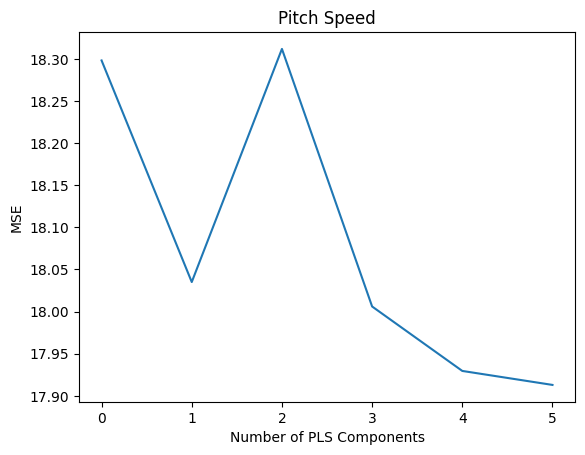

In [9]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=1)

mse = []
n = len(X)

# Create ones column for intercept calculation
X.insert(0, "intercept", np.ones(100), True)

for i in np.arange(1, 7):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Pitch Speed')


#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

print(np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test)))))

How Close Can we Model the data so the SE Reaches 0 deviation without Overfitting?